## Homework7
#### 李佳慜 10235501405

1.

In [54]:
import pandas as pd

file_path = 'D:\save\github_bot_raw_data.csv'
df = pd.read_csv(file_path)
print(f"去重前的数据量: {len(df)}")
df_unique = df.drop_duplicates()
print(f"去重后的数据量: {len(df_unique)}")
df_unique.to_csv('D:\save\github_bot_raw_data_unique.csv', index=False)

去重前的数据量: 20358
去重后的数据量: 19779


2.

In [55]:
import pandas as pd

file_path = 'D:\\save\\github_bot_raw_data_unique.csv'
df = pd.read_csv(file_path)

df.drop('gravatar_id', axis=1, inplace=True)
print("各列的缺失值情况：")
print(df.isnull().sum())

boolean_columns = ['company', 'location'] 
for col in boolean_columns:
    df[col] = df[col].notnull()
text_columns = df.columns.difference(boolean_columns)
for col in text_columns:
    df[col].fillna('', inplace=True)

print("\n处理后的各列缺失值情况：")
print(df.isnull().sum())
df.to_csv(file_path, index=False)

各列的缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64

处理后的各列缺失值情况：
actor_

3.

In [56]:
import pandas as pd

file_path = 'D:\\save\\github_bot_raw_data_unique.csv'
df = pd.read_csv(file_path)

df['created_at'] = pd.to_datetime(df['created_at']).apply(lambda x: x.timestamp())
df['updated_at'] = pd.to_datetime(df['updated_at']).apply(lambda x: x.timestamp())

#输出转换后的数据
print(df.head())
df.to_csv(file_path, index=False)

   actor_id  label      login        id               node_id  \
0   1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1  13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2     22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3   7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4   2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   

                                          avatar_url  \
0  https://avatars.githubusercontent.com/u/108140...   
1  https://avatars.githubusercontent.com/u/131005...   
2  https://avatars.githubusercontent.com/u/22494?v=4   
3  https://avatars.githubusercontent.com/u/764803...   
4  https://avatars.githubusercontent.com/u/216352...   

                                      url                      html_url  \
0    https://api.github.com/users/dlazesz    https://github.com/dlazesz   
1  https://api.github.com/users/sarkiroka  https://github.com/sarkiroka   
2  https://api.github.com/users/ZoomQuiet  http

4.

4.1

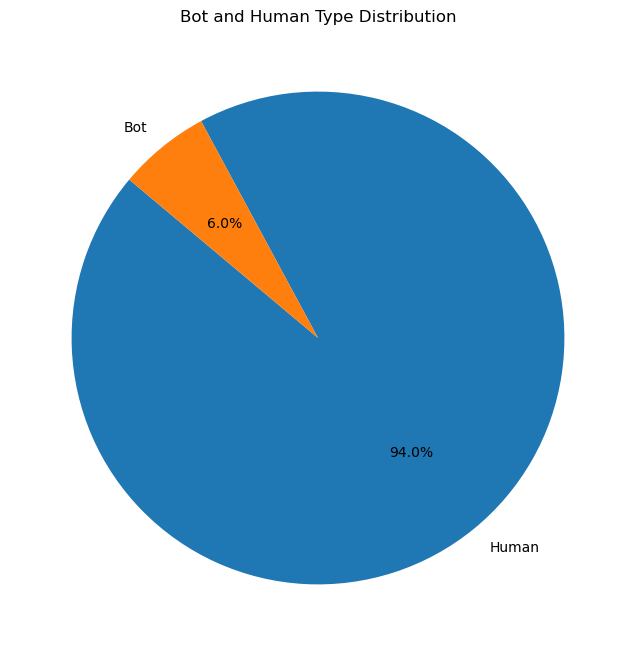

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\\save\\github_bot_raw_data_unique.csv')
type_counts = df['label'].value_counts()
 
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Bot and Human Type Distribution')
plt.show()

选择图表：饼图     
原因：饼图能够直观地展示Bot和Human两种类型账号在总体中的占比。   
结果分析：通过饼图可以看出Human类型账号的比例远远高于Bot类型账号。     
数据洞察：这表明在github上，真实的人类用户（Human类型账号）占据了绝大多数。这是一个积极的信号，意味着平台上的互动和贡献主要来自于真实的个体，而不是机器人；同时也可能反映出平台对于机器人账号的有效监管和清理。

4.2

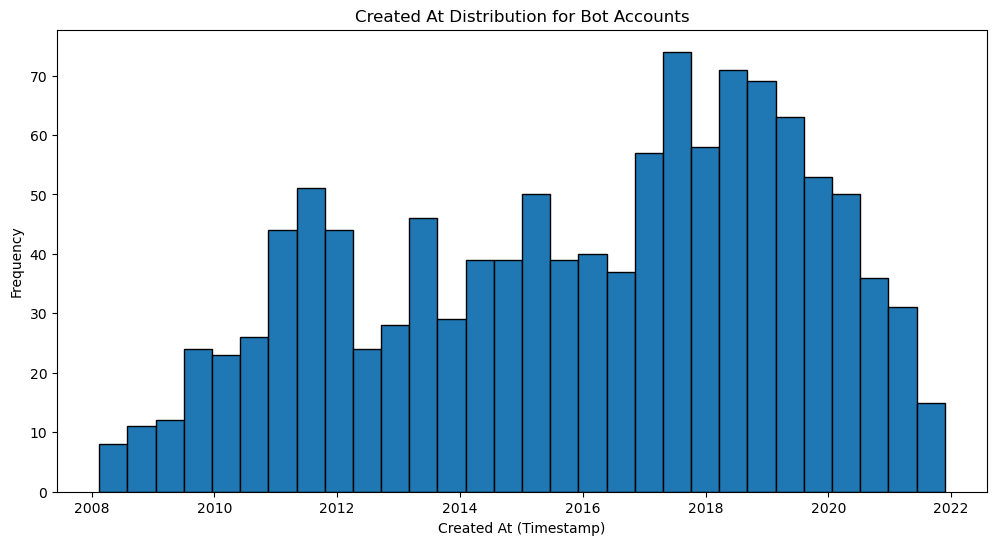

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
 
df = pd.read_csv('D:\\save\\github_bot_raw_data_unique.csv')
bot_df = df[df['label'] == 'Bot'].copy()
bot_df['created_at'] = pd.to_datetime(bot_df['created_at'], unit='s')
 
plt.figure(figsize=(12, 6))
plt.hist(bot_df['created_at'], bins=30, edgecolor='black')
plt.title('Created At Distribution for Bot Accounts')
plt.xlabel('Created At (Timestamp)')
plt.ylabel('Frequency')
plt.show()

选择图表：直方图        
原因：直方图用于展示数据的分布情况，特别是当数据是连续变量时。这里用直方图可以了解Bot类型账号的创建时间（created_at）的分布，看它们是否在特定时间段内大量出现，或者分布是否均匀。      
结果分析：通过该直方图可以看出github平台上创建机器人账户的峰值时期主要在2017-2020年。在2008-2018年数据总体呈上升趋势，2018-2022年呈下降趋势。     
数据洞察：这可能表明了2017-2020年间自动化工具普及，从而吸引了大量开发者创建机器人账户。机器人账户可能用于自动化管理仓库、执行代码审查、部署应用等任务。而之后github可能加强了对机器人账户的管理和审核，提高了创建门槛以减少滥用和恶意行为，导致2018年后创建数量呈下降趋势。

4.3

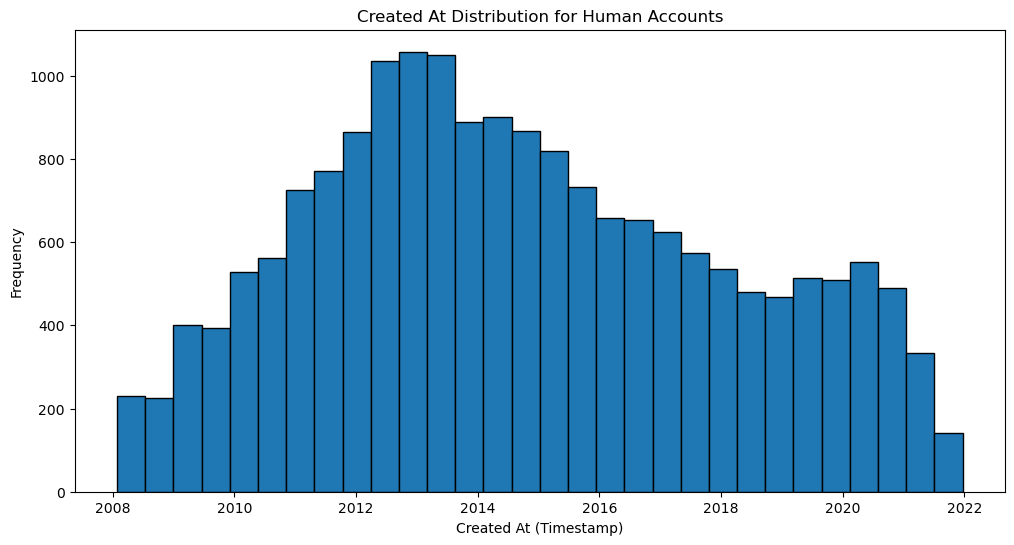

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('D:\\save\\github_bot_raw_data_unique.csv')
bot_df = df[df['label'] == 'Human'].copy()
bot_df['created_at'] = pd.to_datetime(bot_df['created_at'], unit='s')
 
plt.figure(figsize=(12, 6))
plt.hist(bot_df['created_at'], bins=30, edgecolor='black')
plt.title('Created At Distribution for Human Accounts')
plt.xlabel('Created At (Timestamp)')
plt.ylabel('Frequency')
plt.show()

选择图表：直方图        
原因：直方图用于展示数据的分布情况，特别是当数据是连续变量时。这里用直方图可以了解Human类型账号的创建时间（created_at）的分布，看它们是否在特定时间段内大量出现，或者分布是否均匀。      
结果分析：通过该直方图可以看出github平台上创建真人账户的峰值时期主要在2012-2014年。在2008-2013年数据总体呈上升趋势，2013-2022年呈下降趋势。     
数据洞察：这可能表明了2012年至2014年是github平台快速发展并逐渐被广大开发者所接受的时期。这一时期，软件开发和开源文化的兴起也可能推动了真人账户的增长，许多公司和项目开始将代码迁移到github上，吸引了大量开发者加入。而随着时间的推移，github的用户基数逐渐趋于饱和，大多数有需求的开发者已经注册了账户，因此新用户的增长速度放缓。

4.4

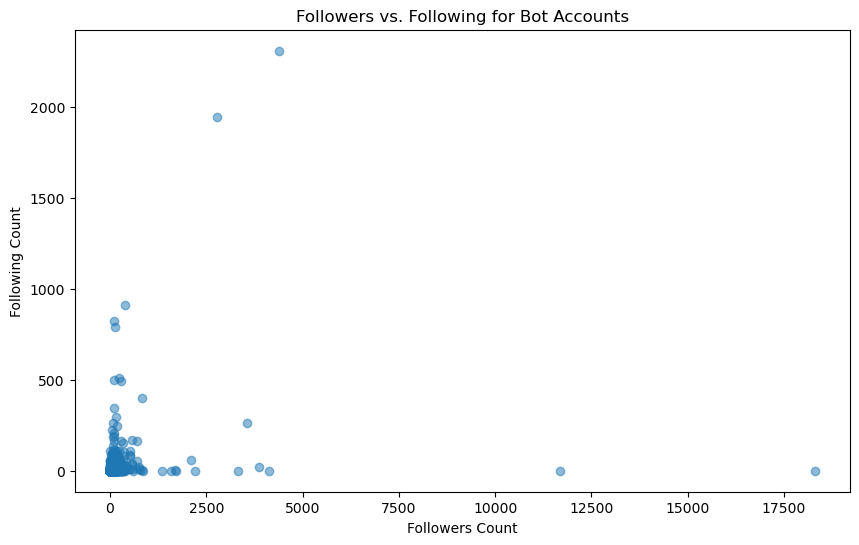

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv('D:\\save\\github_bot_raw_data_unique.csv')
bot_df = df[df['label'] == 'Bot'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(bot_df['followers'], bot_df['following'], alpha=0.5)
plt.xlabel('Followers Count')
plt.ylabel('Following Count')
plt.title('Followers vs. Following for Bot Accounts')
plt.show()

选择图表：散点图       
原因：散点图适合处理大量数据，同时能够展示Bot类型账号的followers和following之间的关系，便于分析两者之间的相关性。   
结果分析：通过该散点图可以看出github上Bot账号的followers和following的数据呈现低低聚集，且大多数Bot账号following不超过500，followers不超过1500。    
数据洞察：这可能表明了机器人账号在github上的社交活动相对有限，它们可能不是为了建立广泛的社交网络或参与社区互动而创建的。并且由于机器人账号可能缺乏真实用户的互动和参与度，它们难以积累大量的粉丝。    

4.5

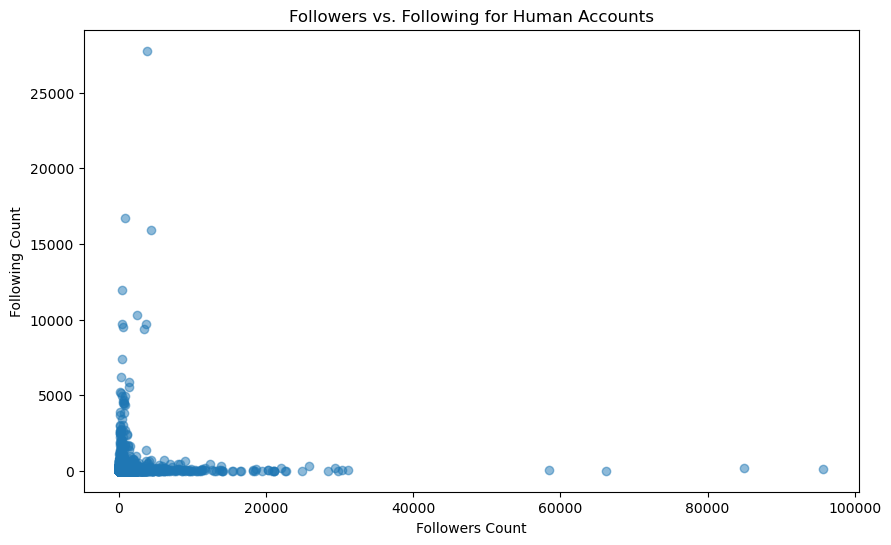

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\\save\\github_bot_raw_data_unique.csv')

bot_df = df[df['label'] == 'Human'].copy()
plt.figure(figsize=(10, 6))
plt.scatter(bot_df['followers'], bot_df['following'], alpha=0.5)
plt.xlabel('Followers Count')
plt.ylabel('Following Count')
plt.title('Followers vs. Following for Human Accounts')
plt.show()

选择图表：散点图       
原因：散点图适合处理大量数据，同时能够展示Human类型账号的followers和following之间的关系，便于分析两者之间的相关性。   
结果分析：通过该散点图可以看出github上Human账号的followers和following的数据也呈现低低聚集，但followers和following平均数量都明显高于Bot账号，大多数Human账号following不超过5000，followers不超过20000。 同时，followers数量高于following数量的账号更多。   
数据洞察：这可能表明了真人账号在github上拥有更多的社交互动和连接，也更容易吸引粉丝。此外，还可能表明github作为开发者和技术专家社区的平台特性，即用户更倾向于关注那些能够提供有用信息和资源的账号，而不是无差别地大量关注其他用户。